In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from matplotlib import pyplot as plt
from matplotlib import cm as cm
from sklearn.svm import SVR
from sklearn import metrics
import seaborn as sns
import pandas as pd 
import numpy as np

In [2]:
np.random.seed(42)
df = pd.read_csv('final_data.csv')
#df.astype({'Data (Transfer) Size (in Bytes)': 'int32'}).dtypes
df.head()

,SP/SM,Num SM,Connection BW,Data (Transfer) Size (in Bytes),Ratio of Global Access,Ratio of FP Instructions,Ratio of Branch Inst,Num Blocks,Num Threads,Speedup,Application Name
0,192,15,NaN,40960,0.086,0.0,0.036,1,256,0.00000,MergeSort
1,192,15,NaN,409600,0.086,0.0,0.036,2,256,43.02926,MergeSort
2,192,15,NaN,4096000,0.086,0.0,0.036,16,256,48.79433,MergeSort
3,128,24,NaN,40960,0.086,0.0,0.036,1,256,1093.75000,MergeSort
4,128,24,NaN,409600,0.086,0.0,0.036,2,256,59.66587,MergeSort


In [3]:
df.dtypes

SP/SM                                int64
Num SM                               int64
Connection BW                      float64
Data (Transfer) Size (in Bytes)      int64
Ratio of Global Access             float64
Ratio of FP Instructions           float64
Ratio of Branch Inst               float64
Num Blocks                           int64
Num Threads                          int64
Speedup                            float64
Application Name                    object
dtype: object

### Correlation, Covariance

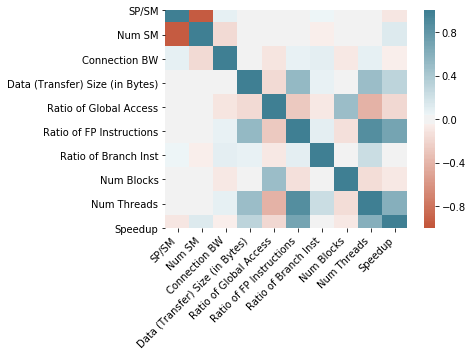

In [4]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

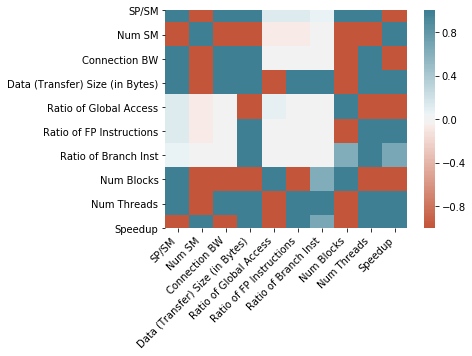

In [5]:
cov = df.cov()
ax = sns.heatmap(
    cov, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Train Test Split

In [6]:
#remove once you have badnwidth
df = df.drop(['Connection BW'], axis=1)

#features-target split
X = df.iloc[:, 0:8].values
y = df.iloc[:, 8].values

#maybe try and standardize.. something on these lines SVM esp prefers standardized data
'''scaler = StandardScaler()
X=scaler.fit(X)
y=df.scaler.fit(y)'''

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Naive Baseline (DO NOT RUN-> Not complete)

Naive baseline is to guess the median value on the training set for all testing cases. If the model cannot better this basic baseline, then nope!

In [ ]:
# Naive baseline is the median
median_pred = X_train['Speedup'].median()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['Speedup']

### Random Forest

In [7]:
#Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

#evalaute
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 19.50236985821634
Mean Squared Error: 1187.8318233761058
Root Mean Squared Error: 34.46493614350832


### SVM

In [8]:
#Support Vector Machine Regressor
regressor = SVR(kernel='rbf') #try different kernels
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

#evalaute
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 125.00716101184236
Mean Squared Error: 160424.2526231039
Root Mean Squared Error: 400.52996470064994


C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### ElasticNet Regression

In [9]:
#ENet Regression
regressor = ElasticNet(alpha=1.0, l1_ratio=0.5)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

#evalaute
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 125.00716101184236
Mean Squared Error: 160424.2526231039
Root Mean Squared Error: 400.52996470064994


### Linear Regression

In [10]:
#Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

#evalaute
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 125.00716101184236
Mean Squared Error: 160424.2526231039
Root Mean Squared Error: 400.52996470064994


### Gradient Boosted Trees

In [11]:
#GBT
regressor = GradientBoostingRegressor(n_estimators=20)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

#evalaute
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 125.00716101184236
Mean Squared Error: 160424.2526231039
Root Mean Squared Error: 400.52996470064994
